In [ ]:
# !pip install librosa
# !pip install seaborn

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model,to_categorical
import librosa.display
import pandas
import tqdm

2022-12-07 18:58:21.505131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-07 18:58:21.505169: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# label_path = 'diagnosis.csv'
# labels = pandas.read_csv(label_path)

In [ ]:
# labels['id'][6]

In [ ]:
# a = 111

In [ ]:
# index = a - 101
# labels['disease'][index]

In [ ]:
def get_audio_files():
    audio_path = './ICBHI_final_database/'
    label_path = 'diagnosis.csv'
    labels = pandas.read_csv(label_path)
    files = listdir(audio_path)
    data = []
    audio_files = [f for f in files if f.endswith('.wav')] # Gets all audio files (.wav)
    audio_files = sorted(audio_files)
    for file in audio_files:
        patient_id = file.split('_')[0]
        idx = int(patient_id) - labels['id'][0]
        data.append((file, labels['disease'][idx]))
    return data, audio_path

In [ ]:
def audio_features(files, n_fft, win_length, hop_length, n_mfcc):
    wavfile, sr = librosa.load(files, duration=15)
    spec = np.abs(librosa.stft(wavfile, n_fft, hop_length, win_length, window='hann', dtype = np.complex256,center=True))
    spec = librosa.power_to_db(spec**2, ref=np.max)
    mfccs = librosa.feature.mfcc(y=wavfile, sr=sr, n_mfcc=40)
    return sr, spec, mfccs

In [ ]:
# def prepare_labels():


In [ ]:
def save_data():
    data, path = get_audio_files()
#     i = 1
    for x in tqdm.tqdm(data):
#         print('preparing file: ',i)
        sr, spec, mfcc = audio_features(path+x[0], n_fft = 512, win_length = 256, hop_length = 512, n_mfcc = 40)
        np.save('./features/spectrograms/'+x[0].split('.')[0], spec)
        np.save('./features/mfcc/'+x[0].split('.')[0], mfcc)
        np.save('./features/labels/'+x[0].split('.')[0], x[1])
#         i += 1
    return


In [ ]:
save_data()

  0%|                                                   | 0/920 [00:00<?, ?it/s]/tmp/ipykernel_30538/2538317188.py:3: FutureWarning: Pass n_fft=512, hop_length=512, win_length=256 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spec = np.abs(librosa.stft(wavfile, n_fft, hop_length, win_length, window='hann', dtype = np.complex256,center=True))
100%|█████████████████████████████████████████| 920/920 [11:09<00:00,  1.37it/s]


In [ ]:
s = np.load('./features/spectrograms/107_2b3_Pl_mc_AKGC417L.npy')
m = np.load('./features/mfcc/101_1b1_Al_sc_Meditron.npy')
l = np.load('./features/labels/107_2b3_Pl_mc_AKGC417L.npy')

In [ ]:
s.shape, m.shape, l

((257, 646), (40, 646), array('COPD', dtype='<U4'))

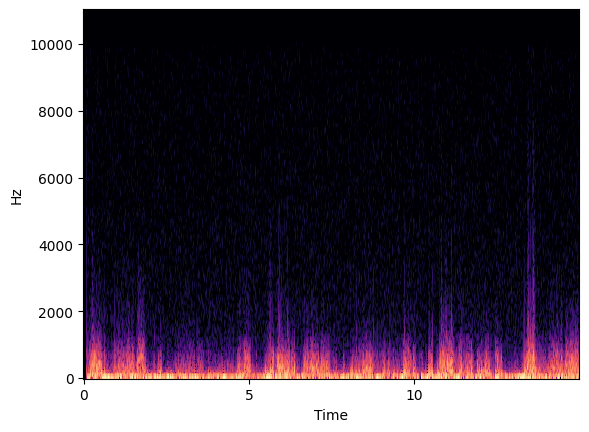

In [ ]:
img = librosa.display.specshow(s, y_axis='linear', x_axis='time',sr=22050)